In [1]:
#Evalucion 2
#!pip install geopandas
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [51]:
#!pip install matplotlib

In [3]:
#Let's open the other maps:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [64]:
#Keep the maps for one country
turkey=countries[countries.COUNTRY=='Turkey']

In [65]:
#Details on the cities
cities[cities.COUNTRY=='Turkey'].head()

,NAME,COUNTRY,CAPITAL,geometry
105,Istanbul,Turkey,N,POINT (29.00607 41.06596)
112,Ankara,Turkey,Y,POINT (32.85327 39.92933)
115,Erzurum,Turkey,N,POINT (41.29182 39.90445)
134,Adana,Turkey,N,POINT (35.32436 36.99998)
312,Izmir,Turkey,N,POINT (27.20577 38.43892)


In [67]:
cities_turkey=cities[cities.COUNTRY=='Turkey']

In [70]:
rivers_turkey = gpd.clip(gdf=rivers,
                               mask=turkey)
rivers_turkey

,NAME,SYSTEM,geometry
81,Tigris,Tigris/Euphrates,"LINESTRING (39.71820 38.56257, 40.21320 38.427..."
19,Euphrates,Tigris/Euphrates,"LINESTRING (38.25325 36.91281, 38.07737 37.135..."
43,Murat,Tigris/Euphrates,"LINESTRING (43.78237 39.37091, 43.87792 39.616..."
20,Firat,Tigris/Euphrates,"LINESTRING (41.75460 40.25229, 41.52681 40.062..."


In [63]:
#Find the right CRS for the country, and make sure the other maps share the same one.
turkey.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [71]:
cities_turkey.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
rivers_turkey.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

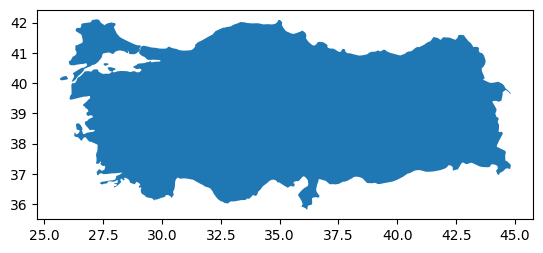

In [73]:
#Plot the projected maps 
#Each one independently.
turkey.plot()

<Axes: >

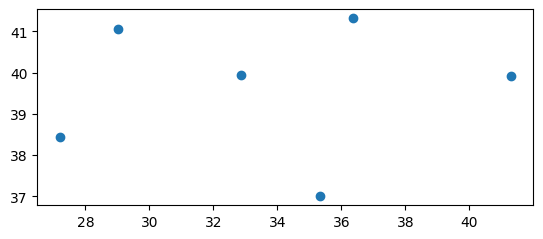

In [74]:
cities_turkey.plot()

<Axes: >

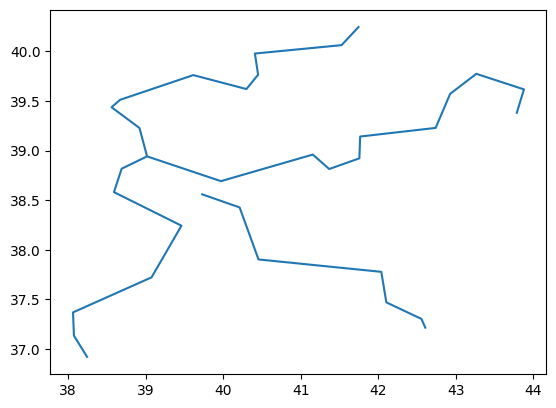

In [75]:
rivers_turkey.plot()

<Axes: >

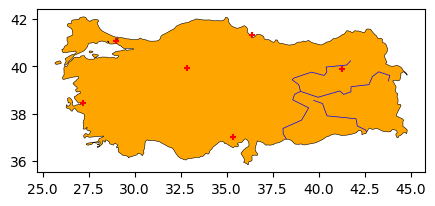

In [80]:
#Plot the clipped version
#All together
base = turkey.plot(facecolor="orange", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_turkey.plot(marker='+', color='red', markersize=15,ax=base)
rivers_turkey.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [109]:
#All together interactively
turkeyCoord=[38.963745, 35.243322]

In [82]:
m = cities_turkey.explore(location=turkeyCoord,
                   zoom_start=4,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") #optional
m = rivers_turkey.explore(m=m, color="blue",
                   name="rivers")
m

In [83]:
#Save the NON interactive map (6.2) as an image
# unit is in degrees:
turkey.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [84]:
# centroid
#This operation warn you on this issue
turkey.centroid

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13220\1030152232.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  turkey.centroid


221    POINT (35.17959 39.06048)
dtype: geometry

In [88]:
#I used a link, where you can find a crs per country
# recommended for Romania (meters)
turkey.to_crs(5636).crs.axis_info


[Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [89]:
# this works with no warning
turkey.to_crs(5636).centroid


221    POINT (6464489.701 2145554.161)
dtype: geometry

<Axes: >

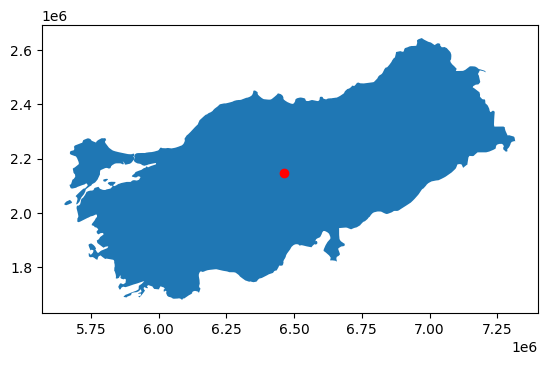

In [90]:
# replotting:

base5636=turkey.to_crs(5636).plot()
turkey.to_crs(5636).centroid.plot(color='red',ax=base5636)


In [91]:
turkey_5636=turkey.to_crs(5636)
# just turkey

cities_turkey=cities[cities.COUNTRY=='Turkey']
cities_5636=cities_turkey.to_crs(turkey_5636.crs)

rivers_5636=rivers.to_crs(turkey_5636.crs)
rivers_5636=gpd.clip(gdf=rivers_5636,mask=turkey_5636)

<Axes: >

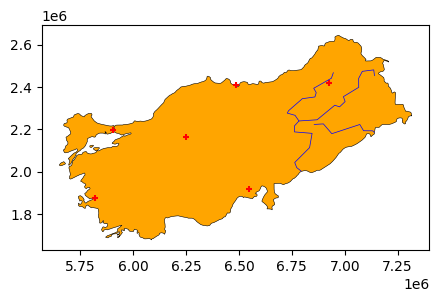

In [93]:
base = turkey_5636.plot(facecolor="orange", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_5636.plot(marker='+', color='red', markersize=15,ax=base)
rivers_5636.plot(edgecolor='blue', linewidth=0.5,ax=base)

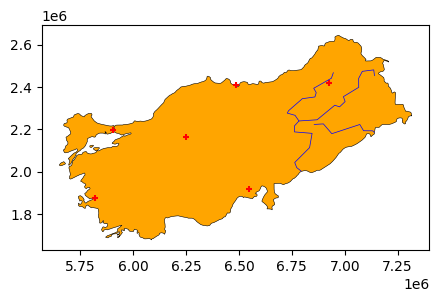

In [94]:
#Exporting maps
# save the map as image
import matplotlib.pyplot as plt

base = turkey_5636.plot(facecolor="orange", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_5636.plot(marker='+', color='red', markersize=15,ax=base)
mapEnd=rivers_5636.plot(edgecolor='blue', linewidth=0.5,ax=base)
plt.savefig(os.path.join("figures",'mapTurkey.jpg'))

In [107]:
# Save the three reprojected maps  into one geopackage file.
import os

turkey_5636.to_file(os.path.join("maps","turkey_5636","turkeyMaps_5636.gpkg"), layer='country', driver="GPKG")
cities_5636.to_file(os.path.join("maps","turkey_5636","turkeyMaps_5636.gpkg"), layer='cities', driver="GPKG")
rivers_5636.to_file(os.path.join("maps","turkey_5636","turkeyMaps_5636.gpkg"), layer='rivers', driver="GPKG")

In [108]:
#Get the link for the geopackage and make sure it is working well.
turkeyMaps_5636='https://github.com/1IAS21-Tarea/simpleplot/raw/main/maps/turkey_5636/turkeyMaps_5636.gpkg'

In [110]:
from  fiona import listlayers

listlayers(turkeyMaps_5636)

['country', 'cities', 'rivers']

In [113]:
turkey_5636=gpd.read_file(turkeyMaps_5636,layer='country')
cities_5636=gpd.read_file(turkeyMaps_5636,layer='cities')
rivers_5636=gpd.read_file(turkeyMaps_5636,layer='rivers')

<Axes: >

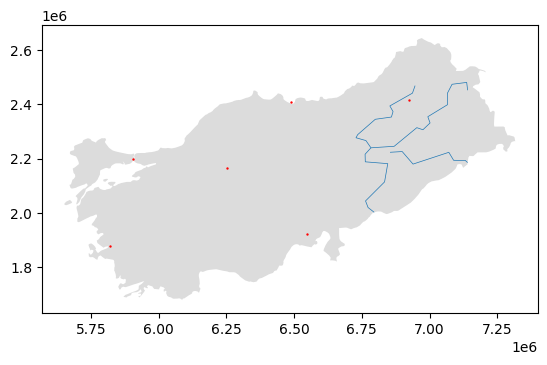

In [114]:
base = turkey_5636.plot(facecolor='gainsboro')
cities_5636.plot(ax=base, markersize=0.5, color='red') 
rivers_5636.plot(ax=base, linewidth=0.5)